In [104]:
import sys
sys.path.append('../')
%load_ext autoreload
%autoreload 2
import pandas as pd
import pickle as pkl
import warnings
warnings.simplefilter(action='ignore')
import numpy as np
from notebook_utils import *
from parameter_estimation import load_data_util
import numpy as np
import pandas as pd
import snap
import operator
from sklearn import metrics
import networkx as nx
import scikitplot as skplt
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='serif', size='15') # controls default text sizes
plt.rc('xtick', labelsize='15')
plt.rc('ytick', labelsize='15')
plt.rc('legend', fontsize='15') # legend fontsize
plt.rc('axes', labelsize='15', titlesize='15')  # fontsize of the x and y labels # fontsize of the axes title
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Synthetic data: F1 Variation with sample size (at each mixture distribution)

<Figure size 216x216 with 0 Axes>

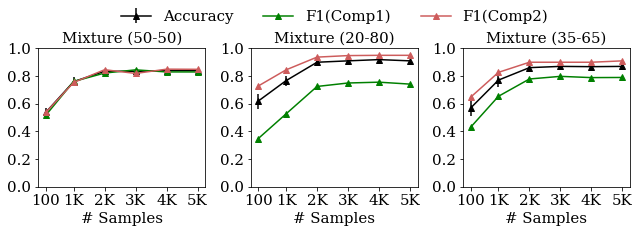

In [105]:
import operator
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(3,3))
list_a, list_f1A, list_f1B, list_yerr_a = [], [], [], []
# 50-50 Accuracy
a = [0.538, 0.589, 0.76, 0.823, 0.835, 0.83, 0.834, 0.84, 0.84, 0.84, 0.84]
f1A = [0.537, 0.602, 0.754, 0.835, 0.846, 0.822, 0.819, 0.849, 0.85, 0.85, 0.849]
f1B = [0.517, 0.564, 0.761, 0.811, 0.822, 0.836, 0.845, 0.83, 0.83, 0.83, 0.83]
yerr_a = [0.03059412, 0.03139218, 0.03273618, 0.009, 0.005, 0, 0, 0, 0, 0, 0]
list_a.append(a); list_f1A.append(f1A); list_f1B.append(f1B); list_yerr_a.append(yerr_a)

# 20-80 Accuracy
a = [0.619, 0.611, 0.767, 0.849, 0.9, 0.908, 0.91, 0.91, 0.919, 0.911, 0.91]
f1A = [0.728, 0.722, 0.845, 0.901, 0.937, 0.943, 0.948, 0.95, 0.95, 0.95, 0.95]
f1B = [0.348, 0.355, 0.527, 0.665, 0.725, 0.747, 0.75, 0.75, 0.756, 0.749, 0.742]
yerr_a = [0.05393515, 0.06064297, 0.03626123, 0.03718675, 0.00894427, 0.004, 0, 0, 0.003, 0.003, 0]
list_a.append(a); list_f1A.append(f1A); list_f1B.append(f1B); list_yerr_a.append(yerr_a)

# 35-65 Accuracy
a = [0.569, 0.622, 0.771, 0.847, 0.861, 0.869, 0.87, 0.869, 0.868, 0.87, 0.87]
f1A = [0.647, 0.696, 0.827, 0.887, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.91]
f1B = [0.43, 0.482, 0.654, 0.765, 0.779, 0.79, 0.798, 0.79, 0.789, 0.79, 0.79]
yerr_a = [0.05579514, 0.04717513, 0.04657252, 0.01004988, 3.00E-03, 3.00E-03, 1.11E-16, 3.00E-03, 4.00E-03, 1.11E-16, 0]
list_a.append(a); list_f1A.append(f1A); list_f1B.append(f1B); list_yerr_a.append(yerr_a)

x = [100, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]


fig, axs = plt.subplots(1, 3, figsize=(9,3))

for i, ax in enumerate(axs):
    a, f1A, f1B, yerr_a = list_a[i], list_f1A[i], list_f1B[i], list_yerr_a[i]
    A = a[0::2]
    X = x[0::2]
    F1A = f1A[::2]
    F1B = f1B[::2]
    Yerr_a = yerr_a[::2]
    l1 = ax.errorbar(X, A, yerr=Yerr_a, linestyle='-', marker='^', color='black', label='Accuracy') # , linewidth=2, markersize=5, label='Accuracy')
    l2 = ax.errorbar(X, F1B, color='green', marker='^', linestyle='-', label='F1 (Component 1)') # , linewidth=2, markersize=5, label='F1 (Component 1)')
    l3 = ax.errorbar(X, F1A, color='indianred', marker='^', linestyle='-', label='F1 (Component 2)') # , linewidth=2, markersize=5, label='F1 (Component 2)')

    # plt.xticks(x, ['100', '', '1000', '', '2000', '', '3000', '', '4000', '', '5000']) #, ["1K","2K", "5K", "10K"])
    # plt.xticks(x, ['100', '', '1K', '', '2K','', '3K','', '4K', '', '5K']) # , fontsize=15, rotation=0) 
    ax.set_xticks(X)
    ax.set_xticklabels(['100', '1K', '2K', '3K', '4K', '5K']) # , fontsize=15, rotation=0)
    ax.set_xlabel('# Samples')
    ax.set_yticks(np.arange(0, 1.1, 0.2)) # fontsize=15)
    ax.set_ylim(0, 1.0) # plt.ylim(0, 1.0)
    # matplotlib.rcParams['figure.figsize'] = 4, 4
    
axs[0].set_title('Mixture (50-50)', loc='center') # -0.01)
axs[1].set_title('Mixture (20-80)', loc='center') # -0.01)
axs[2].set_title('Mixture (35-65)', loc='center') # -0.01)
    
# plt.xticks(range(3), ['100', '1K', '2K', '3K', '4K', '5K'])
fig.legend([l1, l2, l3], labels=['Accuracy', 'F1(Comp1)', 'F1(Comp2)'], loc='lower left', bbox_to_anchor= (0.2, 1.01), ncol=3, 
            borderaxespad=-1, frameon=False)
plt.tight_layout()
plt.savefig("newsep.pdf", bbox_inches='tight')
    # plt.savefig("newsep_2080")
    # plt.savefig("newsep_5050")
    # plt.savefig("newsep_3565")

print()

<Figure size 288x288 with 0 Axes>

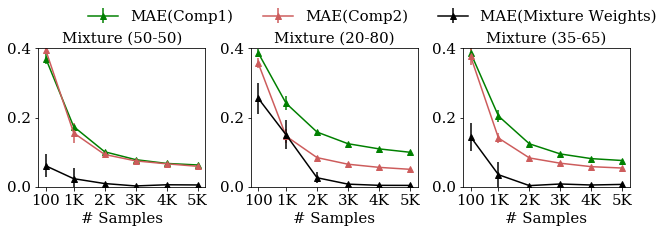

In [106]:
plt.figure(figsize=(4,4))

list_all = []

# 50-50 REC
a = [0.37074579, 0.25019493, 0.17404112, 0.12540508, 0.10128784, 0.09072607, 0.07849716, 0.07209409, 0.06757301, 0.06547084, 0.06311453]
b = [0.3949215, 0.24545285, 0.15568542, 0.10752383, 0.0933878, 0.08378726, 0.07491487, 0.06884225, 0.06643143, 0.06250859, 0.05921113]
c = [0.06062301, 0.02945277, 0.02348285, 0.0133709, 0.00942099, 0.00148567, 0.00246742, 0.0028287, 0.00585847, 0.00692459, 0.0053351]
yerr_a =[0.01559338, 0.01229178, 0.00463468, 0.00453263, 0.00251584, 0.00138803, 0.00236395, 0.00088981, 0.00041529, 0.00024523, 0.00024458]
yerr_b = [0.01125925, 0.02007671, 0.02983395, 0.00334533, 0.00143176, 0.00083398, 0.0016343, 0.00044455, 0.00027153, 0.00010729, 0.00015296]
yerr_c = [0.03342509, 0.03328124, 0.02947875, 0.00855437, 0.00197116, 0.00143394, 0.00122095, 0.00206881, 0.0015377, 0.00163429, 0.0023901]
list_all.append([a, b, c, yerr_a, yerr_b, yerr_c])

# 20-80 REC
a = [0.38725599, 0.3076971, 0.24145477, 0.18859934, 0.15822143, 0.13764647, 0.12451263, 0.11706931, 0.10963067, 0.10454634, 0.09982226]
b = [0.3575607, 0.21797727, 0.14646918, 0.10859049, 0.08432286, 0.07281996, 0.0652692, 0.0592536, 0.05621151, 0.05286894, 0.05054079]
c =[0.25596714, 0.26309091, 0.15032923, 0.0824454, 0.02617578, 0.01671644, 0.00770426, 0.0021292, 0.00423743, 0.00638563, 0.00403792]
yerr_a= [0.01062006, 0.01490311, 0.02031074, 0.02706351, 0.00430746, 0.00326909, 0.00191078, 0.0013886, 0.00086065, 0.00088548, 0.00074231]
yerr_b= [0.01349547, 0.01082175, 0.02035687, 0.02351415, 0.00387934, 0.00231865, 0.0005127, 0.00030366, 0.00020685, 0.00022859, 0.00023127]
yerr_c=[0.04526637, 0.04038411, 0.04177962, 0.07846018, 0.01594264, 0.00552713, 0.00410155, 0.00133193, 0.00092739, 0.00084702, 0.00175291]
list_all.append([a, b, c, yerr_a, yerr_b, yerr_c])


# 35-65 REC
a= [0.38730426, 0.29005627, 0.20453674, 0.14857088, 0.12417421, 0.11013571, 0.09489955, 0.08761794, 0.08140841, 0.07595319, 0.07595319]
b=[0.37721129, 0.22732048, 0.14089289, 0.10126032, 0.08339687, 0.07541356, 0.06815356, 0.06213098, 0.05815313, 0.05422041, 0.05422041]
c= [0.14450361, 0.0927384, 0.03495736, 0.01304002, 0.00343374, 0.00311035, 0.00811258, 0.0015987, 0.00518599, 0.00695579, 0.00695579]
yerr_a = [0.01531402, 0.01804096, 0.01839811, 0.00531005, 0.0023592, 0.00128358, 0.00104922, 0.00045345, 0.00102119, 0.00018216, 0.00018216]
yerr_b = [0.02399086, 0.02056504, 0.01450604, 0.00294091, 0.00067655, 0.00071754, 0.00049323, 0.00038846, 0.00048446, 0.00019417, 0.00019417]
yerr_c =[0.04133387, 0.04560605, 0.03764683, 0.00486948, 0.00239576, 0.00256609, 0.00168882, 0.0012212, 0.00238907, 0.00149278, 0.00149278]
list_all.append([a, b, c, yerr_a, yerr_b, yerr_c])


x = [100, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]

fig, axs = plt.subplots(1, 3, figsize=(9,3))

for i, ax in enumerate(axs):
    a, b, c, yerr_a, yerr_b, yerr_c = list_all[i]

    A = a[0::2]
    X = x[0::2]
    B = b[::2]
    C = c[::2]
    Yerr_a = yerr_a[::2]
    Yerr_b = yerr_b[::2]
    Yerr_c = yerr_c[::2]
    l1 = ax.errorbar(X, A, yerr=Yerr_a, linestyle='-', marker='^', color='green') # , linewidth=2, markersize=5, label='Accuracy')
    l2 = ax.errorbar(X, B, yerr=Yerr_b, color='indianred', marker='^', linestyle='-') # , linewidth=2, markersize=5, label='F1 (Component 1)')
    l3 = ax.errorbar(X, C, yerr=Yerr_c, color='black', marker='^', linestyle='-') # , linewidth=2, markersize=5, label='F1 (Component 2)')

    # plt.xticks(x, ['100', '', '1000', '', '2000', '', '3000', '', '4000', '', '5000']) #, ["1K","2K", "5K", "10K"])
    # plt.xticks(x, ['100', '', '1K', '', '2K','', '3K','', '4K', '', '5K']) # , fontsize=15, rotation=0) 
    ax.set_xticks(X)
    ax.set_xticklabels(['100', '1K', '2K', '3K', '4K', '5K']) # , fontsize=15, rotation=0)
    ax.set_xlabel('# Samples')
    ax.set_yticks(np.arange(0, 1.1, 0.2)) # fontsize=15)
    ax.set_ylim(0, 0.4) # plt.ylim(0, 1.0)
    
    # matplotlib.rcParams['figure.figsize'] = 4, 4

axs[0].set_title('Mixture (50-50)', loc='center') # -0.01)
axs[1].set_title('Mixture (20-80)', loc='center') # -0.01)
axs[2].set_title('Mixture (35-65)', loc='center') # -0.01)

# plt.xticks(range(3), ['100', '1K', '2K', '3K', '4K', '5K'])
fig.legend([l1, l2, l3], labels=['MAE(Comp1)', 'MAE(Comp2)', 'MAE(Mixture Weights)'], loc='lower left', bbox_to_anchor= (0.15, 1.01), ncol=3, 
            borderaxespad=-1, frameon=False)
plt.tight_layout()
plt.savefig("newrec.pdf", bbox_inches='tight')
    # plt.savefig("newsep_2080")
    # plt.savefig("newsep_5050")
    # plt.savefig("newsep_3565")

print()

# Synthetic data: MAE Variation with sample size (at each mixture distribution)

[0.38730426, 0.20453674, 0.12417421, 0.09489955, 0.08140841, 0.07595319] [100, 1000, 2000, 3000, 4000, 5000] [0.01531402, 0.01839811, 0.0023592, 0.00104922, 0.00102119, 0.00018216]


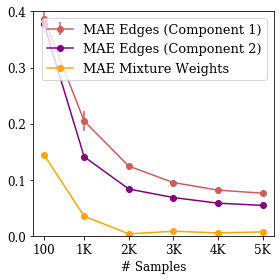

In [6]:
import operator
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(4,4))

# 50-50 REC
a = [0.37074579, 0.25019493, 0.17404112, 0.12540508, 0.10128784, 0.09072607, 0.07849716, 0.07209409, 0.06757301, 0.06547084, 0.06311453]
b = [0.3949215, 0.24545285, 0.15568542, 0.10752383, 0.0933878, 0.08378726, 0.07491487, 0.06884225, 0.06643143, 0.06250859, 0.05921113]
c = [0.06062301, 0.02945277, 0.02348285, 0.0133709, 0.00942099, 0.00148567, 0.00246742, 0.0028287, 0.00585847, 0.00692459, 0.0053351]
yerr_a =[0.01559338, 0.01229178, 0.02463468, 0.00453263, 0.00251584, 0.00138803, 0.00236395, 0.00088981, 0.00041529, 0.00024523, 0.00024458]
yerr_b = [0.01125925, 0.02007671, 0.02983395, 0.00334533, 0.00143176, 0.00083398, 0.0016343, 0.00044455, 0.00027153, 0.00010729, 0.00015296]
yerr_c = [0.03342509, 0.03328124, 0.02947875, 0.00855437, 0.00197116, 0.00143394, 0.00122095, 0.00206881, 0.0015377, 0.00163429, 0.0023901]


# 20-80 REC
# a = [0.38725599, 0.3076971, 0.24145477, 0.18859934, 0.15822143, 0.13764647, 0.12451263, 0.11706931, 0.10963067, 0.10454634, 0.09982226]
# b = [0.3575607, 0.21797727, 0.14646918, 0.10859049, 0.08432286, 0.07281996, 0.0652692, 0.0592536, 0.05621151, 0.05286894, 0.05054079]
# c =[0.25596714, 0.26309091, 0.15032923, 0.0824454, 0.02617578, 0.01671644, 0.00770426, 0.0021292, 0.00423743, 0.00638563, 0.00403792]
# yerr_a= [0.01062006, 0.01490311, 0.02031074, 0.02706351, 0.00430746, 0.00326909, 0.00191078, 0.0013886, 0.00086065, 0.00088548, 0.00074231]
# yerr_b= [0.01349547, 0.01082175, 0.02035687, 0.02351415, 0.00387934, 0.00231865, 0.0005127, 0.00030366, 0.00020685, 0.00022859, 0.00023127]
# yerr_c=[0.04526637, 0.04038411, 0.08177962, 0.07846018, 0.01594264, 0.00552713, 0.00410155, 0.00133193, 0.00092739, 0.00084702, 0.00175291]


# 35-65 REC
a= [0.38730426, 0.29005627, 0.20453674, 0.14857088, 0.12417421, 0.11013571, 0.09489955, 0.08761794, 0.08140841, 0.07595319, 0.07595319]
b=[0.37721129, 0.22732048, 0.14089289, 0.10126032, 0.08339687, 0.07541356, 0.06815356, 0.06213098, 0.05815313, 0.05422041, 0.05422041]
c= [0.14450361, 0.0927384, 0.03495736, 0.01304002, 0.00343374, 0.00311035, 0.00811258, 0.0015987, 0.00518599, 0.00695579, 0.00695579]
yerr_a = [0.01531402, 0.01804096, 0.01839811, 0.00531005, 0.0023592, 0.00128358, 0.00104922, 0.00045345, 0.00102119, 0.00018216, 0.00018216]
yerr_b = [0.02399086, 0.02056504, 0.01450604, 0.00294091, 0.00067655, 0.00071754, 0.00049323, 0.00038846, 0.00048446, 0.00019417, 0.00019417]
yerr_c =[0.06133387, 0.05560605, 0.03764683, 0.00486948, 0.00239576, 0.00256609, 0.00168882, 0.0012212, 0.00238907, 0.00149278, 0.00149278]


x = [100, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]

fig, axs = plt.subplots(1, 3, figsize=(9,3))

for i, ax in enumerate(axs):
    a, f1A, f1B, yerr_a = list_a[i], list_f1A[i], list_f1B[i], list_yerr_a[i]
    A = a[0::2]
    X = x[0::2]
    F1A = f1A[::2]
    F1B = f1B[::2]
    Yerr_a = yerr_a[::2]
    l1 = ax.errorbar(X, A, yerr=Yerr_a, linestyle='-', marker='^', color='black', label='Accuracy') # , linewidth=2, markersize=5, label='Accuracy')
    l2 = ax.errorbar(X, F1B, color='green', marker='^', linestyle='-', label='F1 (Component 1)') # , linewidth=2, markersize=5, label='F1 (Component 1)')
    l3 = ax.errorbar(X, F1A, color='indianred', marker='^', linestyle='-', label='F1 (Component 2)') # , linewidth=2, markersize=5, label='F1 (Component 2)')

    # plt.xticks(x, ['100', '', '1000', '', '2000', '', '3000', '', '4000', '', '5000']) #, ["1K","2K", "5K", "10K"])
    # plt.xticks(x, ['100', '', '1K', '', '2K','', '3K','', '4K', '', '5K']) # , fontsize=15, rotation=0) 
    ax.set_xticks(X)
    ax.set_xticklabels(['100', '1K', '2K', '3K', '4K', '5K']) # , fontsize=15, rotation=0)
    ax.set_xlabel('# Samples')
    ax.set_yticks(np.arange(0, 1.1, 0.2)) # fontsize=15)
    ax.set_ylim(0, 1.0) # plt.ylim(0, 1.0)
    # matplotlib.rcParams['figure.figsize'] = 4, 4
    
    
# plt.xticks(range(3), ['100', '1K', '2K', '3K', '4K', '5K'])
fig.legend([l1, l2, l3], labels=['Accuracy', 'F1(Comp1)', 'F1(Comp2)'], loc='lower left', bbox_to_anchor= (0.2, 1.01), ncol=3, 
            borderaxespad=-1, frameon=False)
plt.tight_layout()
plt.savefig("newsep", bbox_inches='tight')
    # plt.savefig("newsep_2080")
    # plt.savefig("newsep_5050")
    # plt.savefig("newsep_3565")

print()

a = a[0::2]
x = x[0::2]
b = b[::2]
c = c[::2]
yerr_a = yerr_a[::2]
print(a, x, yerr_a)
plt.errorbar(x, a, yerr=yerr_a, linestyle='-', marker='o', color='indianred', label='MAE Edges (Component 1)') # , linewidth=2, markersize=5, label='Accuracy')
plt.errorbar(x, b, color='purple', marker='o', linestyle='-', label='MAE Edges (Component 2)') # , linewidth=2, markersize=5, label='F1 (Component 1)')
plt.errorbar(x, c, color='orange', marker='o', linestyle='-', label='MAE Mixture Weights') # , linewidth=2, markersize=5, label='F1 (Component 2)')

plt.xticks(x, ['100', '1K', '2K', '3K', '4K', '5K']) # , fontsize=15, rotation=0)


# plt.errorbar(x, a, yerr=yerr_a, linestyle='-', marker='o', color='steelblue', linewidth=2, markersize=5, label='MAE Edges (Component 1)')
# plt.errorbar(x, b, yerr=yerr_b, color='indianred', marker='o', linestyle='-', linewidth=2, markersize=5, label='MAE Edges (Component 2)')
# plt.errorbar(x, c, yerr=yerr_c, color='gray', marker='o', linestyle='--', linewidth=2, markersize=5, label='MAE Mixture Weights')

# plt.xticks(x, ['100', '', '1K', '', '2K', '', '3K', '', '4K', '', '5K'], fontsize=15, rotation=0) #, ["1K","2K", "5K", "10K"])
plt.yticks(np.arange(0, 11, 1.0)*0.1)
plt.xlabel('# Samples') # , fontsize=15)
# plt.yticks(fontsize=15)
plt.ylim(0.0, 0.4)
# plt.ylabel('Training time (min) \n', fontsize=15)
plt.legend(loc='upper right') #, fontsize=11)
plt.tight_layout()
# plt.savefig("newrec_2080")
plt.savefig("newrec_5050")
# plt.savefig("newrec_3565")


# Intervention analysis (Edge intervention)

In [4]:
# n_groups = 5

# means_oursgcn = [209.948] * n_groups
# means_ours = [210.464, 208.872, 206.496, 206.836, 205.196]
# means_linear = [193.844, 188.372, 169.164, 158.18, 105.728]

# # means_oursgcn = [100.7, 100.7, 100.7, 100.7]  # [60.293800, 90.099400, 99.163800, 109.7248, 147.251000]
# # means_ours = [91.08, 92.1, 87.78, 88.76] # [27.4858, 45.2956, 60.1078, 81.3892, 133.9648]
# # means_linear = [89.52, 88.1, 85.32, 82.92] # [71.647600, 91.751800, 102.42420, 109.07100, 146.83020] # ('MAE:', 3.799) - check for singleton seeds
# # means_logistic = [66.8156, 89.11, 98.02, 105.58, 160.19] # TODO (MAE: 2.691)
# # means_random = [28.262400,47.580000,61.714000,74.498800,128.902000]

# yerr_oursgcn = [19.792354483486797/1.5] * n_groups
# yerr_ours = np.array([18.858014317525587, 19.53252712784498, 18.270686467672746, 20.974105558998218, 19.18096931857199])/1.5
# yerr_linear = np.array([19.94280983211744, 19.5491589588913, 18.975170723869653, 12.94, 10.28659399412653])/1.5

# # yerr_logistic = [0.627607, 0.501393, 0.458658, 0.453951, 0.3805]
# # yerr_random = [0.968185,0.999080,0.985040,0.945063,0.655020]
 
# # create plot
# fig, ax = plt.subplots(figsize=(4,4))
# index = np.arange(n_groups)
# bar_width = 0.1
 
# # rects1 = plt.bar(index, means_oursgcn, bar_width,
# # yerr = yerr_oursgcn,
# # alpha=opacity,
# # color='steelblue',
# # label='Without Intervention')

# without_x = [0,1,2,3,4,5]
# without_y = [209.948] * len(without_x)
# plt.plot(without_x, without_y, '--', color='black', label='Without intervention') # , yerr = yerr_oursgcn, color='indianred')

# rects2 = plt.bar(index + bar_width, means_ours, bar_width,
# alpha=0.8,
# color="orange",
# label='Random Intervention') # yerr = yerr_ours,
 
# rects3 = plt.bar(0.1 + index + 2*bar_width, means_linear, bar_width,
# alpha=0.8,
# color="indianred",
# label='MIC Intervention') # yerr = yerr_linear,
    
# # rects4 = plt.bar(index + 3*bar_width, means_logistic, bar_width,
# # yerr = yerr_logistic,
# # alpha=opacity*0.5,
# # color="gray",
# # label='Constrained Logistic')

# # rects5 = plt.bar(index + 4*bar_width, means_random, bar_width,
# # yerr = yerr_random,
# # alpha=opacity,
# # color=colors["indianred"],
# # label='Random')

# plt.xlabel('K (# edges removed)')
# plt.ylabel('Expected Cascade Size')
# # plt.title('Influence maximization', fontsize=15)
# plt.xticks(index, ('20', '50', '100', '250', '500'))
# plt.legend(loc='lower left')
 
# # plt.tight_layout()
# # # plt.savefig("newkwon_edge_inter.pdf", bbox_inches='tight')



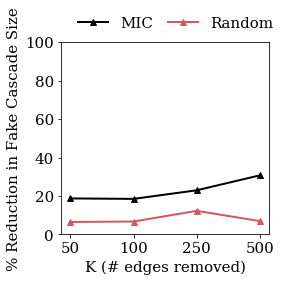

In [112]:
plt.figure(figsize=(4, 4))

n_groups = 4
index = np.arange(n_groups)

# kwon
means_oursgcn = [31.64] * n_groups # [209.948] * n_groups
means_ours = [29.598, 29.516, 27.764, 29.45]  # [210.464, 208.872, 206.496, 206.836, 205.196]  28.13, 
means_linear = [25.718, 25.794, 24.378, 21.918] # [31.26, 38.52, 31.96, 28.38, 20.42] [193.844, 188.372, 169.164, 158.18, 105.728] 29.246

# tma
# means_oursgcn = [344.111] * n_groups (ignore this)
# means_ours = [335.199, 352.394, 363.815, 341.657, 329.577]
# means_linear = [345.958, 337.522, 342.039, 282.173, 248.634] 

# means_oursgcn = [363.815] * n_groups
# means_ours = [352.394, 344.11, 341.657, 329.577] # 335.199, 
# means_linear = [342.039, 337.522, 282.173, 248.634] # 345.958, 

# DIFFERENCES
baseline = means_oursgcn[0]
random = baseline - np.array(means_ours) 
mic = baseline - np.array(means_linear)
random = random/baseline; mic = mic/baseline
# random = means_ours; mic = means_linear; 

# means_oursgcn = [100.7, 100.7, 100.7, 100.7]  # [60.293800, 90.099400, 99.163800, 109.7248, 147.251000]
# means_ours = [91.08, 92.1, 87.78, 88.76] # [27.4858, 45.2956, 60.1078, 81.3892, 133.9648]
# means_linear = [89.52, 88.1, 85.32, 82.92] # [71.647600, 91.751800, 102.42420, 109.07100, 146.83020] # ('MAE:', 3.799) - check for singleton seeds
# means_logistic = [66.8156, 89.11, 98.02, 105.58, 160.19] # TODO (MAE: 2.691)
# means_random = [28.262400,47.580000,61.714000,74.498800,128.902000]

# yerr_oursgcn = [19.792354483486797/1.5] * n_groups
# yerr_ours = np.array([18.858014317525587, 19.53252712784498, 18.270686467672746, 20.974105558998218, 19.18096931857199])/1.5
# yerr_linear = np.array([19.94280983211744, 19.5491589588913, 18.975170723869653, 12.94, 10.28659399412653])/1.5

without_x = index # [0,1,2,3,4]
without_y = means_oursgcn # [209.948] * len(without_x)

# plt.errorbar(without_x, without_y, yerr_oursgcn, linestyle='--', color='black', marker='o', label='Without intervention') # , yerr = yerr_oursgcn, color='indianred')

# plt.errorbar(without_x, means_linear, yerr_linear, linestyle='-', color='steelblue', marker='o', label='MIC intervention') # , yerr = yerr_oursgcn, color='indianred')

# plt.errorbar(without_x, means_ours, yerr_ours, linestyle='-', color='indianred', marker='o', label='Random intervention') # , yerr = yerr_oursgcn, color='indianred')

# plt.plot(without_x, without_y, linestyle='--', color='black', marker='o', label='Without intervention') # , yerr = yerr_oursgcn, color='indianred')

l1 = plt.plot(without_x, mic, linestyle='-', color='black', marker='^', label='MIC intervention', linewidth=2) # , yerr = yerr_oursgcn, color='indianred')

l2 = plt.plot(without_x, random, linestyle='-', color='indianred', marker='^', label='Random intervention', linewidth=2) # , yerr = yerr_oursgcn, color='indianred')

l = [l1, l2]

plt.xlabel('K (# edges removed)')
plt.ylabel('% Reduction in Fake Cascade Size')
# plt.title('Influence maximization', fontsize=15)
plt.xticks(index, ('50', '100', '250', '500'))
plt.ylim(0, 1.0)
plt.yticks(np.arange(0, 1.1, 0.2), labels=np.arange(0, 101, 20))
plt.legend(l, labels=['MIC', 'Random'], loc='center', bbox_to_anchor= (0.55, 1.1), ncol=2, borderaxespad=-3, frameon=False, columnspacing=1, labelspacing=0.1)
plt.tight_layout()
plt.savefig("newkwon_edge_inter.pdf", bbox_inches='tight')
# plt.savefig("newtma_edge_inter.pdf", bbox_inches='tight')

# Cascade Dynamics (Inferred edges test)

.............
Seedset: 10501473
Maxlength of simulated cascade: 27
Final expected size of cascade: 6.859999999999997
Max # tweets expected at any timestep: 1.0
.............
Seedset: 6481132,42598690
Maxlength of simulated cascade: 11
Final expected size of cascade: 3.300000000000001
Max # tweets expected at any timestep: 2.0
.............
Seedset: 52656642,23539100
Maxlength of simulated cascade: 2
Final expected size of cascade: 3.0
Max # tweets expected at any timestep: 2.0
.............
Seedset: 51298452,16759010
Maxlength of simulated cascade: 1
Final expected size of cascade: 2.0
Max # tweets expected at any timestep: 2.0
.............
Seedset: 23086420
Maxlength of simulated cascade: 1
Final expected size of cascade: 1.0
Max # tweets expected at any timestep: 1.0
.............
Seedset: 28117383,29264958
Maxlength of simulated cascade: 1
Final expected size of cascade: 2.0
Max # tweets expected at any timestep: 2.0
.............
Seedset: 12987474,30971958,28117383
Maxlength of si

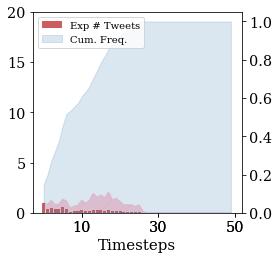

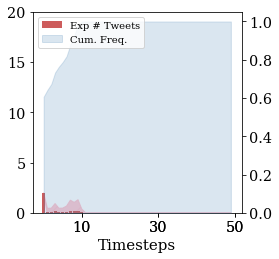

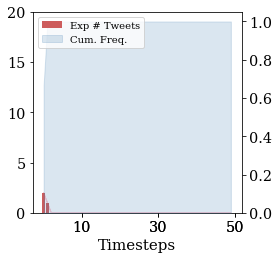

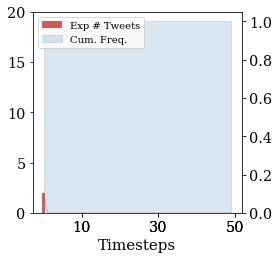

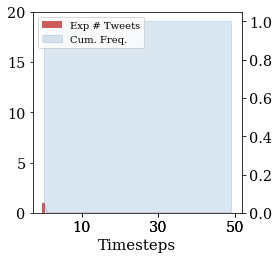

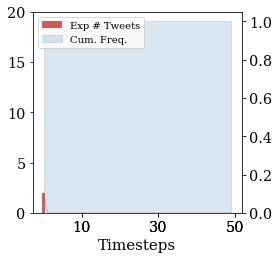

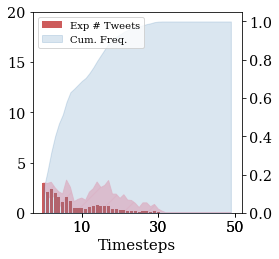

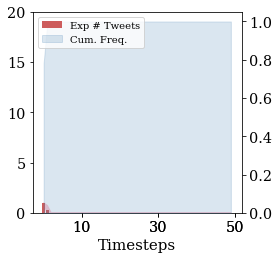

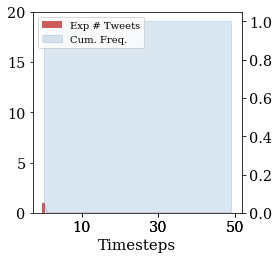

In [103]:
import operator
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': '13',
          'figure.figsize': (4, 4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
import pickle, sys

# to_plot = False
to_plot = True

case = 3

if case == 0:
    cascades_dict = pkl.load(open("/home/krsharma/wsdm2020_mic_code/main/pred_cas/trueseeds_fakediffkwon.pkl", "rb"), encoding="latin1")
    saveimg_path = 'Tinf_F/trueseeds_fakediffkwon'
elif case == 1:
    cascades_dict = pkl.load(open("/home/krsharma/wsdm2020_mic_code/main/pred_cas/trueseeds_truediffkwon.pkl", "rb"), encoding="latin1")
    saveimg_path = 'Tinf_T/trueseeds_truediffkwon'
elif case == 2:
    cascades_dict = pkl.load(open("/home/krsharma/wsdm2020_mic_code/main/pred_cas/fakeseeds_fakediffkwon.pkl", "rb"), encoding="latin1")
    saveimg_path = 'Finf_F/fakeseeds_fakediffkwon'
elif case == 3:
    cascades_dict = pkl.load(open("/home/krsharma/wsdm2020_mic_code/main/pred_cas/fakeseeds_truediffkwon.pkl", "rb"), encoding="latin1")
    saveimg_path = 'Finf_T/fakeseeds_truediffkwon'

count = 0

for pltno, (seedset, sims) in enumerate(cascades_dict.items()): # [-2:-1]):
    
    print(".............")
    print("Seedset:", seedset)
    
    list_actives = []
    maxlen = 0
    for cas in sims:
        u = cas[:, 0]
        t = cas[:, 1]
        time = -1
        actives = []
        for i in t:
            if i > time:
                time += 1
                actives.append(1)
            else:
                actives[time] += 1
        list_actives.append(actives)
        if len(actives) > maxlen:
            maxlen = len(actives)
    print("Maxlength of simulated cascade:", maxlen)
    if maxlen < 50:
        maxlen = 50
#     if maxlen < 100:
#         maxlen = 100
    expected_cascade = np.zeros((len(list_actives), maxlen))
    for i, act in enumerate(list_actives):
        expected_cascade[i] = np.array(act + [0]* (maxlen-len(act)))

    mean = np.mean(expected_cascade, 0)
    std = np.std(expected_cascade, 0)
    cum = 1.0* np.cumsum(mean)
    cumnorm = cum/np.max(cum)
    print("Final expected size of cascade:", np.max(cum))
    print("Max # tweets expected at any timestep:", np.max(mean))
    
    if to_plot:
        f = plt.figure()
        x_pts = np.arange(maxlen)

        ax1 = f.add_subplot(111)
        # line1 = ax1.bar(x_pts, mean, yerr=std, color='indianred', label="expected")
        line1 = ax1.bar(x_pts, mean, color='indianred', label="expected")
        ax1.fill_between(x_pts, mean-std, mean+std,  color='pink',alpha=0.8, hatch = '/')
        ax1.set_xticks(np.arange(0, maxlen+1, 10)[1::2])
        ax1.set_ylim(0, 20)
        # ax1.set_xticks(np.arange(0, maxlen+1, 20))
        # ax1.set_ylim(0, 40)
        
        ax2 = f.add_subplot(111, sharex=ax1, frameon=False)
        line2 = ax2.fill_between(x_pts, cumnorm, color='steelblue', alpha=0.2, label="expected")
        # ax2.set_xticks(np.arange(0, maxlen+1, 10))
        # ax2.set_xticks(np.arange(0, maxlen+1, 20))
        ax2.set_ylim(0, 1+0.05)
        ax2.yaxis.tick_right()
        ax2.yaxis.set_label_position("right")

        plt.legend((line1, line2), ('Exp # Tweets', 'Cum. Freq.'), loc='upper left', fontsize=10)
        
        # plt.legend((line1, line2), labels=('Exp # Tweets', 'Cum. Freq.'), loc='center', bbox_to_anchor= (0.55, 1), ncol=3, borderaxespad=-4, frameon=False, columnspacing=0, labelspacing=0.1)
        plt.xlabel('Timesteps', fontsize=15)
        plt.xticks()
#         ax1.set_ylabel('Exp # Tweets')
#         ax2.set_ylabel('Cum Freq')
        plt.tight_layout()
        if saveimg_path:
            plt.savefig('{}{}.pdf'.format(saveimg_path, pltno))
         
    if count == -1:
        break
    count += 1


# ('Seedset:', '22225065')
# ('Maxlength of simulated cascade:', 13)
# ('Final expected size of cascade:', 2.4800000000000004)
# ('Max # tweets expected at any timestep:', 1.0)